# Bike Sharing

In this project, I will process data from a company that facilitates bike-sharing, customers can rent a bike from one place and return it to another. My goal is to inspect and analyze data and then predict daily bike rentals using the linear regression model.

This dataset is from the University of Wisconsin - Madison.

## Import Python Libraries

In this project, we used pandas and numpy to load and manipulate data, sklearn to train model, and seaborn and matplotlib to conduct graphical analysis.

In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Load and inspect data

In [2]:
# Load data from web.
url = 'http://bit.ly/bike-data'
df_bike = pd.read_csv(url)

In [3]:
# Calculate the dimensions (rows and columns) in the dataset. 
df_bike.shape

(731, 14)

In [4]:
# List the columns in the dataset along with their data types.
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  731 non-null    int64  
 1   date                731 non-null    object 
 2   yr                  731 non-null    int64  
 3   mnth                731 non-null    int64  
 4   weekday             731 non-null    int64  
 5   season              731 non-null    int64  
 6   holiday             731 non-null    int64  
 7   working_day         731 non-null    int64  
 8   temp                731 non-null    float64
 9   atemp               731 non-null    float64
 10  hum                 731 non-null    float64
 11  windspeed           731 non-null    float64
 12  casual_rentals      731 non-null    int64  
 13  registered_rentals  731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [5]:
# Preview the first 5 records of the dataset.
df_bike.head(5)

,ID,date,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals
0,1,1/1/2011,0,1,6,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654
1,2,1/2/2011,0,1,0,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670
2,3,1/3/2011,0,1,1,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,1/4/2011,0,1,2,1,0,1,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,1/5/2011,0,1,3,1,0,1,0.226957,0.229270,0.436957,0.186900,82,1518


In [6]:
# Create a new column called "total_rentals" that sums the "casual_rentals" and "registered_rentals" columns.
df_bike['total_rentals'] = df_bike['casual_rentals'] + df_bike['registered_rentals']

In [7]:
# Check the new column.
df_bike.head()

,ID,date,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals,total_rentals
0,1,1/1/2011,0,1,6,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,0,1,0,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,0,1,1,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,0,1,2,1,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,0,1,3,1,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Generate Descriptive Statistics

We described the basic features of the data in our project and also checked whether is there any outliers included.

In [8]:
# Generate descriptive stats for the numeric columns in the dataset. 
df_bike.describe()

,ID,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals,total_rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,6.519836,2.997264,2.496580,0.028728,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,2.004787,1.110807,0.167155,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,7.000000,3.000000,3.000000,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,10.000000,5.000000,3.000000,0.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,12.000000,6.000000,4.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
# Create a pivot table to present summary of data.
pd.pivot_table(df_bike, index=['yr', 'mnth'], values=['total_rentals'], aggfunc=[np.sum, np.mean])

sum          mean
        total_rentals total_rentals
yr mnth                            
0  1            38189   1231.903226
   2            48215   1721.964286
   3            64045   2065.967742
   4            94870   3162.333333
   5           135821   4381.322581
   6           143512   4783.733333
   7           141341   4559.387097
   8           136691   4409.387097
   9           127418   4247.266667
   10          123511   3984.225806
   11          102167   3405.566667
   12           87323   2816.870968
1  1            96744   3120.774194
   2           103137   3556.448276
   3           164875   5318.548387
   4           174224   5807.466667
   5           195865   6318.225806
   6           202830   6761.000000
   7           203607   6567.967742
   8           214503   6919.451613
   9           218573   7285.766667
   10          198841   6414.225806
   11          152664   5088.800000
   12          123713   3990.741935

In [10]:
# Check missing values.
df_bike.isnull().sum()

ID                    0
date                  0
yr                    0
mnth                  0
weekday               0
season                0
holiday               0
working_day           0
temp                  0
atemp                 0
hum                   0
windspeed             0
casual_rentals        0
registered_rentals    0
total_rentals         0
dtype: int64

## Explore data

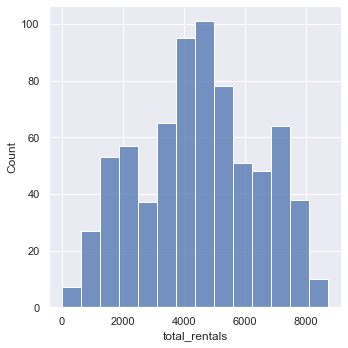

In [11]:
# Generate a histogram to visualize the distribution of data in the "total_rentals" column.
sns.displot(df_bike, x="total_rentals");

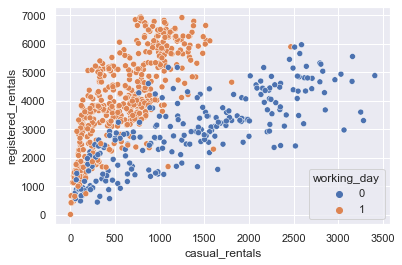

In [12]:
# Generate a scatterplot.
# Working_day = 1 -> Monday to Friday, 0 -> Saturday or Sunday
sns.scatterplot(x="casual_rentals", y="registered_rentals", hue="working_day", data=df_bike);

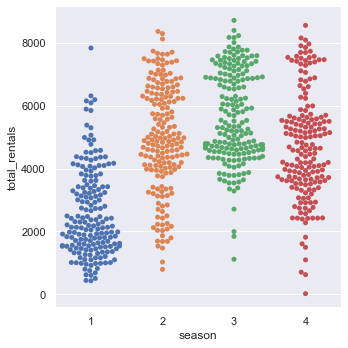

In [13]:
# Generate a swarmplot to explore the total rentals by season.
# Season = 1 -> winter, 2 -> spring, 3 -> summer, 4 -> autumn
sns.catplot(x="season", y="total_rentals", kind="swarm", data=df_bike);

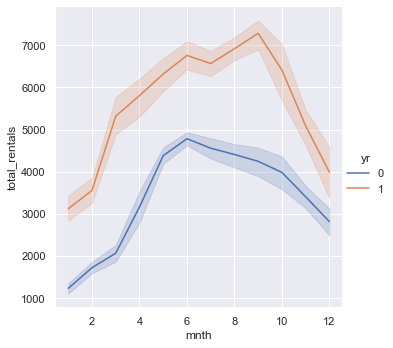

In [14]:
# Generate a line plot that shows average daily rentals by month and split the lines by year.
sns.relplot(x="mnth", y="total_rentals", hue="yr", kind="line", data=df_bike);

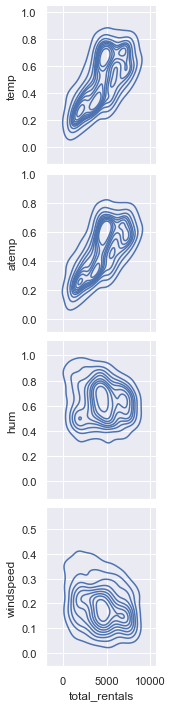

In [15]:
# Generate a pairplot to show the relationship between "total_rentals" and the weather indicators ("temp", "atemp", "hum", and "windspeed").
sns.pairplot(df_bike, x_vars="total_rentals", y_vars=["temp", "atemp", "hum", "windspeed"], kind="kde");

## Prepare data for modeling

Before building a model, we should decide which variables will be used in our model.

In [16]:
df_bike_new = df_bike.drop(columns=['ID', 'date', 'mnth', 'weekday', 'atemp', 'casual_rentals', 'registered_rentals', ])

<AxesSubplot:>

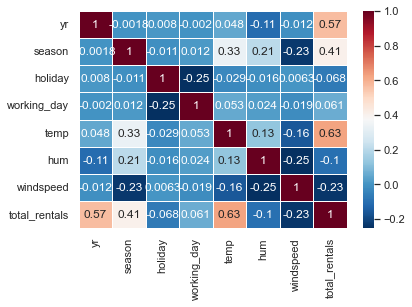

In [17]:
corr = df_bike_new.corr()
sns.heatmap(corr, cmap = 'RdBu_r', linewidth = 0.8, annot = True)

## Linear regression model

In [18]:
# Linear Regression
# Split the data into training and test sets.
X = df_bike[['temp', 'yr', 'season']]
y = df_bike['total_rentals']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Identify the intercepts and coefficients.
print(model.intercept_)
print(model.coef_)

-182.92965819834717
[5564.75416671 2009.03658246  379.55612815]


In [21]:
# Use the regression model to predict total bike rentals in the test data.
# Store your predictions in a variable called "y_pred". 
y_pred = model.predict(X_test)
y_pred

array([4776.87177564, 5129.30435128, 1495.06725393, 1266.02753718,
       4106.95591428, 3876.53444544, 3950.72931275, 5862.38269729,
       5019.79912849, 1328.93151828,  999.88760441, 2005.17157413,
       2224.13352108, 4513.24617104, 5110.75702564, 4109.80149396,
       6210.88005103, 5509.95012165, 3893.63662806, 2971.44755784,
       6897.20344143, 3615.39891972, 5120.41732998, 4429.77485854,
       3109.9356045 , 6503.02964478, 5676.50332275, 4609.92915063,
       6289.01570499, 5831.32392288,  966.41560809, 4600.65270544,
       5829.92348623, 4823.24287211, 2274.13283727, 3963.19605514,
       7286.7362331 , 7759.74033727, 2505.99944913, 3885.80532588,
       5757.12905558, 2219.29218496, 4766.89511211, 4473.30037534,
       6957.48642332, 6205.54439248, 3725.08022435, 4702.67134358,
       3675.68746636, 1984.3046867 , 6550.10652433, 7091.96983726,
       5168.19442785, 6234.76859997, 4906.71418461, 3890.44633086,
       3143.83995857, 5880.93002292, 7031.68129062, 3684.95834

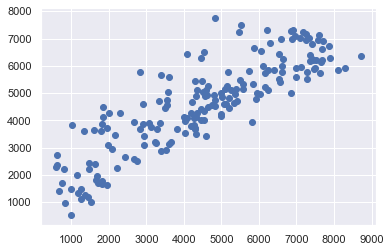

In [22]:
plt.scatter(y_test, y_pred)

In [23]:
# Generate the R squared.
metrics.r2_score(y_test, y_pred)

0.7292079280983106

## Conclusion

1. Registered rentals are more popular on weekdays, and casual rentals are on weekends.
2. The number of total rentals is the lowest in winter.
3. The number of total rentals increases from the 1st year to the 2nd year and September reaches the highest YoY%.
4. When the tempreature rises, the number of rentals increases.
5. The R squared is around 73%, which means 73% of data fit the our linear regression model.